## Contents
- [Imports](#Imports)
- [Feature Engineering](#Feature-Engineering)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Break Out State Data](#Break-Out-State-Data)
- [Export Data for Modeling](#Export-Data-for-Modeling)

# Imports

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the data.
df = pd.read_csv('../data/cleaned_numbers_five_states.csv')

In [3]:
df.head(2)

,county_state,total_cases,total_fatalities,death_rate,total_tests,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,...,inc_hhlds_200_000_or_more,inc_med_hhld_inc_dol,inc_mean_hhld_inc_dol,inc_per_capita_inc_dol,inc_med_earn_male_full_yr_workers_dol,inc_med_earn_female_full_yr_workers_dol,deaths_per_100_cases,cases_per_100_people,tests_per_100_people,pop_density
0,"Santa Clara County, California",23978.0,388.0,0.016181,839764,1922200,495455,615912,45379,3003,...,160340,116178,154183,52451,90862,64739,1.618150,1.247425,43.687650,1488.824137
1,"San Mateo County, California",10942.0,159.0,0.014531,285657,765935,189002,303047,16838,1151,...,67087,113776,162639,57375,79347,65524,1.453116,1.428581,37.295201,1707.252650


# Feature Engineering

### Create a State Column

In [4]:
# Create a state column based on county_state.
df['state'] = pd.np.where(df['county_state'].str.contains('California'), 'California',
              pd.np.where(df['county_state'].str.contains('Florida'), 'Florida',
              pd.np.where(df['county_state'].str.contains('Illinois'), 'Illinois',
              pd.np.where(df['county_state'].str.contains('New York'), 'New York', 'Texas'))))

### Create a County Column

In [5]:
# Create a county column based on county_state.
df['county'] = df['county_state']

In [6]:
# Dropping extraneous county words for graphing.
df['county'] = df['county'].str.replace(' County, California', '')

In [7]:
df['county'] = df['county'].str.replace(' County, Florida', '')

In [8]:
df['county'] = df['county'].str.replace(' County, Illinois', '')

In [9]:
df['county'] = df['county'].str.replace(' County, New York', '')

In [10]:
df['county'] = df['county'].str.replace(' County, Texas', '')

### Ordinal COVID Severity

In [11]:
df['covid_severity'] = 0

In [12]:
mask1 = df['cases_per_100_people'] < 2
mask2 = (df['cases_per_100_people'] >= 2) & (df['cases_per_100_people'] < 3)
mask3 = df['cases_per_100_people'] >= 3

In [13]:
df['covid_severity'][mask1] = 1

In [14]:
df['covid_severity'][mask2] = 2

In [15]:
df['covid_severity'][mask3] = 3

In [16]:
df['covid_severity'].value_counts()

1    228
3    158
2    157
Name: covid_severity, dtype: int64

### Demographic Recombinations

In [17]:
df['inc_hhlds_less_than_25_000'] = df['inc_hhlds_less_than_10_000']\
                    + df['inc_hhlds_10_000_to_14_999'] + df['inc_hhlds_15_000_to_24_999']

df['inc_hhlds_25_000_to_49_999'] = df['inc_hhlds_25_000_to_34_999']\
                    + df['inc_hhlds_35_000_to_49_999']

df['inc_hhlds_less_than_99_999'] = df['inc_hhlds_less_than_10_000']\
                    + df['inc_hhlds_10_000_to_14_999'] + df['inc_hhlds_15_000_to_24_999']\
                    + df['inc_hhlds_25_000_to_34_999'] + df['inc_hhlds_35_000_to_49_999']\
                    + df['inc_hhlds_50_000_to_74_999'] + df['inc_hhlds_75_000_to_99_999']\

df['inc_hhlds_100_000_or_more'] = df['inc_hhlds_100_000_to_149_999']\
                    + df['inc_hhlds_150_000_to_199_999']

df['inc_hhlds_less_than_49_999'] = df['inc_hhlds_less_than_10_000']\
                    + df['inc_hhlds_10_000_to_14_999'] + df['inc_hhlds_15_000_to_24_999']\
                    + df['inc_hhlds_25_000_to_34_999'] + df['inc_hhlds_35_000_to_49_999']\

df['inc_hhlds_50_000_to_99_999'] = df['inc_hhlds_50_000_to_74_999'] + df['inc_hhlds_75_000_to_99_999']

df['inc_hhlds_100_000_or_more'] = df['inc_hhlds_100_000_to_149_999']\
                    + df['inc_hhlds_150_000_to_199_999']

In [18]:
df['race_pop_other'] = df['race_pop_american_indian_and_alaska_native_alone']\
                    + df['race_pop_native_hawaiian_and_other_pacific_islander_alone']\
                    + df['race_pop_some_other_race_alone'] + df['race_pop_two_or_more_races']

df['race_pop_minority'] = df['race_pop_american_indian_and_alaska_native_alone']\
                    + df['race_pop_native_hawaiian_and_other_pacific_islander_alone']\
                    + df['race_pop_some_other_race_alone'] + df['race_pop_two_or_more_races']\
                    + df['race_pop_hispanic_or_latino_of_any_race']\
                    + df['race_pop_black_or_african_american_alone'] + df['race_pop_asian_alone']

In [19]:
df['sex_age_pop_0_to_44'] = df['sex_age_pop_under_5'] + df['sex_age_pop_5_to_9']\
                    + df['sex_age_pop_10_to_14'] + df['sex_age_pop_15_to_19']\
                    + df['sex_age_pop_20_to_24'] + df['sex_age_pop_25_to_34']\
                    + df['sex_age_pop_35_to_44']

df['sex_age_pop_45_to_74'] = df['sex_age_pop_45_to_54'] + df['sex_age_pop_55_to_59']\
                    + df['sex_age_pop_60_to_64'] + df['sex_age_pop_65_to_74']

df['sex_age_pop_75_and_over'] = df['sex_age_pop_75_to_84'] + df['sex_age_pop_85_and_over']

df['sex_age_pop_0_to_64'] = df['sex_age_pop_under_5'] + df['sex_age_pop_5_to_9']\
                    + df['sex_age_pop_10_to_14'] + df['sex_age_pop_15_to_19']\
                    + df['sex_age_pop_20_to_24'] + df['sex_age_pop_25_to_34']\
                    + df['sex_age_pop_35_to_44'] + df['sex_age_pop_45_to_54']\
                    + df['sex_age_pop_55_to_59'] + df['sex_age_pop_60_to_64']

df['sex_age_pop_65_and_over'] = df['sex_age_pop_65_to_74'] + df['sex_age_pop_75_to_84']\
                    + df['sex_age_pop_85_and_over']

df['sex_age_pop_0_to_35'] = df['sex_age_pop_under_5'] + df['sex_age_pop_5_to_9']\
                    + df['sex_age_pop_10_to_14'] + df['sex_age_pop_15_to_19']\
                    + df['sex_age_pop_20_to_24'] + df['sex_age_pop_25_to_34']

df['sex_age_pop_35_to_59'] = df['sex_age_pop_35_to_44'] + df['sex_age_pop_45_to_54']\
                    + df['sex_age_pop_55_to_59']

df['sex_age_pop_60_to_84'] = df['sex_age_pop_60_to_64'] + df['sex_age_pop_65_to_74']\
                    + df['sex_age_pop_75_to_84']

In [20]:
# Define a function to create new columns with percentages.
def to_percentage(df):
    for column in df.columns:
        if column.startswith('race_pop_'):
            df['percent_' + column] = df[column] / df['race_pop']
        elif column.startswith('sex_age_pop_'):
            df['percent_' + column] = df[column] / df['sex_age_pop']            
        elif column.startswith('health_ins_noninst_pop_cov'):
            df['percent_' + column] = df[column] / df['health_ins_noninst_pop']
        elif column.startswith('inc_hhlds_'):
            df['percent_' + column] = df[column] / df['inc_hhlds']
    return

In [21]:
# Apply the function to the dataframe.
to_percentage(df)

# Exploratory Data Analysis

## Correlations

In [22]:
# Extract the columns with percentages, save to a new dataframe.
df_percent = df.filter(regex = 'percent', axis = 1)

In [23]:
# Other metrics from the original dataframe to carry over.
# These were not total counts and thus not calculated in percentage step.
df_temp = df[[
    'county_state',
    'total_cases',
    'total_fatalities',
    'death_rate',
    'total_tests',
    'sex_age_median_age_in_years', 
    'inc_med_hhld_inc_dol',
    'inc_mean_hhld_inc_dol',
    'inc_per_capita_inc_dol',
    'inc_med_earn_male_full_yr_workers_dol',
    'inc_med_earn_female_full_yr_workers_dol',
    'deaths_per_100_cases',
    'cases_per_100_people',
    'tests_per_100_people',
    'pop_density',
    'covid_severity'
]]

In [24]:
# Concatenate the two dataframes to get a complete feature set.
df_percent = pd.concat([df_temp, df_percent], axis=1)

### Correlations for 'cases_per_100_people'

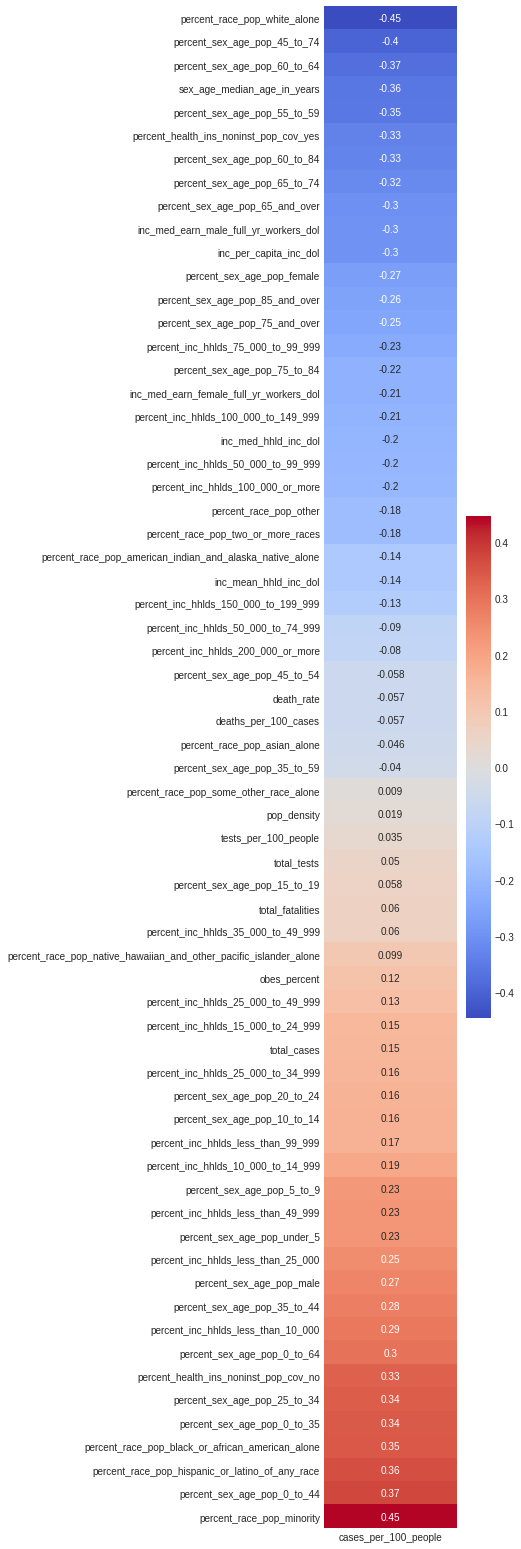

In [25]:
# Visualize the correlation between the variables and 'cases_per_100_people'.
# Save a correlation table to a variable.
corr = df_percent.corr()

# Display a correlation chart just for Sale Price.
plt.figure(figsize=(3, 28))
sns.heatmap(corr[['cases_per_100_people']].sort_values(by='cases_per_100_people').iloc[:-2], annot=True, cmap = 'coolwarm');

### Correlations for 'covid_severity'

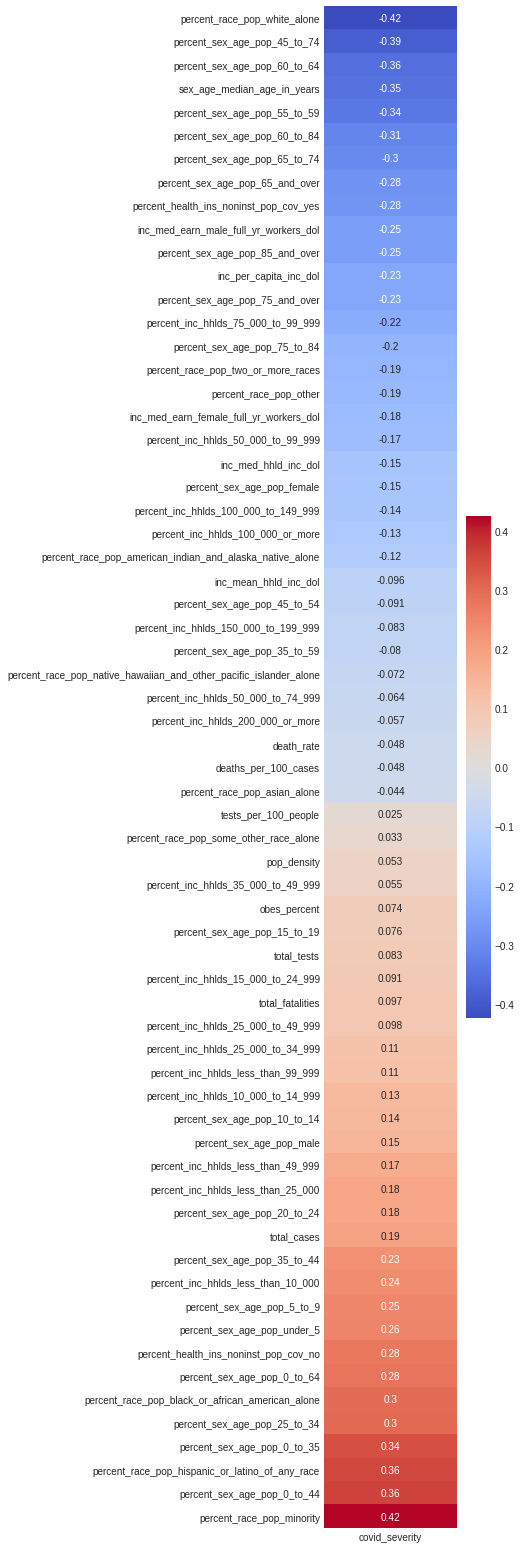

In [26]:
# Visualize the correlation between the variables and 'cases_per_100_people'.
# Save a correlation table to a variable.
corr = df_percent.corr()

# Display a correlation chart just for Sale Price.
plt.figure(figsize=(3, 28))
sns.heatmap(corr[['covid_severity']].sort_values(by='covid_severity').iloc[:-2], annot=True, cmap = 'coolwarm');

## Visualizing Distributions

In [27]:
# Define a custom function to help subplot histograms.
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, 
                       list_of_ylabels, figsize, bins, ncols, hspace):
    plt.style.use('seaborn-whitegrid')
    nrows = int(np.ceil(len(list_of_columns)/ncols))
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize) 
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        ax[i].hist(dataframe[column], bins=bins)
        # Set title for each subplot
        ax[i].set_title(list_of_titles[i], fontsize=14)        
        # Set xlabel for each subplot
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=12)
        # Set ylabel for each subplot
        ax[i].set_ylabel(list_of_ylabels[i], fontsize=12)
        plt.subplots_adjust(hspace=hspace);

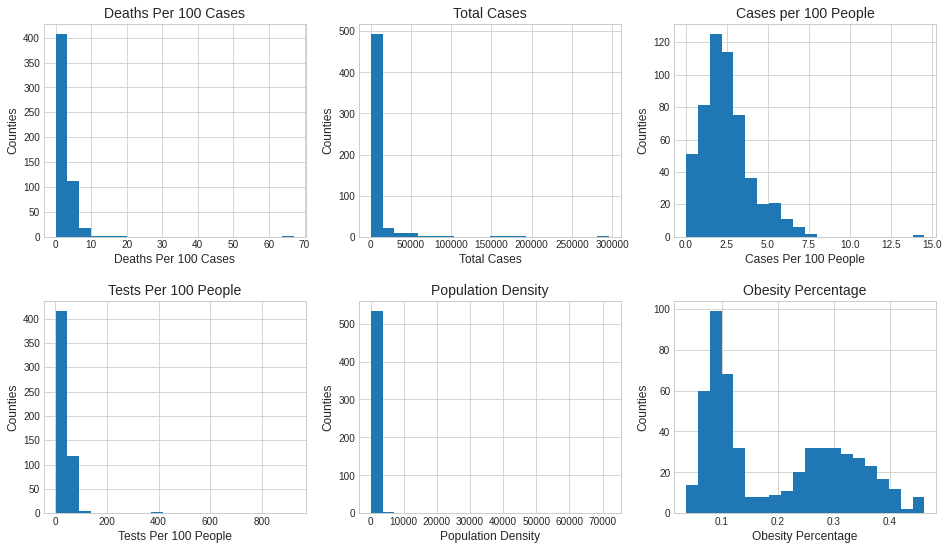

In [28]:
subplot_histograms(
    df,
    ['deaths_per_100_cases', 'total_cases', 'cases_per_100_people', 
     'tests_per_100_people', 'pop_density', 'obes_percent'],
    ['Deaths Per 100 Cases', 'Total Cases', 'Cases per 100 People', 
     'Tests Per 100 People', 'Population Density', 'Obesity Percentage'],
    ['Deaths Per 100 Cases', 'Total Cases', 'Cases Per 100 People', 
     'Tests Per 100 People', 'Population Density', 'Obesity Percentage'],
    ['Counties', 'Counties', 'Counties', 'Counties', 'Counties', 'Counties'],
    figsize=(16,9),
    bins=20,
    ncols=3,
    hspace=.3
)

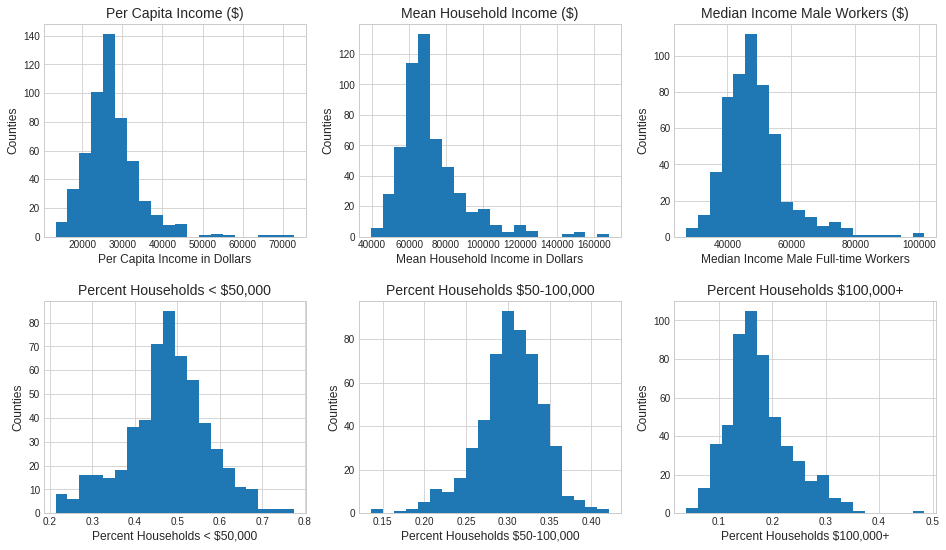

In [29]:
subplot_histograms(
    df,
    ['inc_per_capita_inc_dol', 'inc_mean_hhld_inc_dol', 'inc_med_earn_male_full_yr_workers_dol', 
     'percent_inc_hhlds_less_than_49_999', 'percent_inc_hhlds_50_000_to_99_999', 'percent_inc_hhlds_100_000_or_more'],
    ['Per Capita Income ($)', 'Mean Household Income ($)', 'Median Income Male Workers ($)', 
     'Percent Households < $50,000', 'Percent Households $50-100,000', 'Percent Households $100,000+'],
    ['Per Capita Income in Dollars', 'Mean Household Income in Dollars', 'Median Income Male Full-time Workers', 
     'Percent Households < $50,000', 'Percent Households $50-100,000', 'Percent Households $100,000+'],
    ['Counties', 'Counties', 'Counties', 'Counties', 'Counties', 'Counties'],
    figsize=(16,9),
    bins=20,
    ncols=3,
    hspace=.3
)

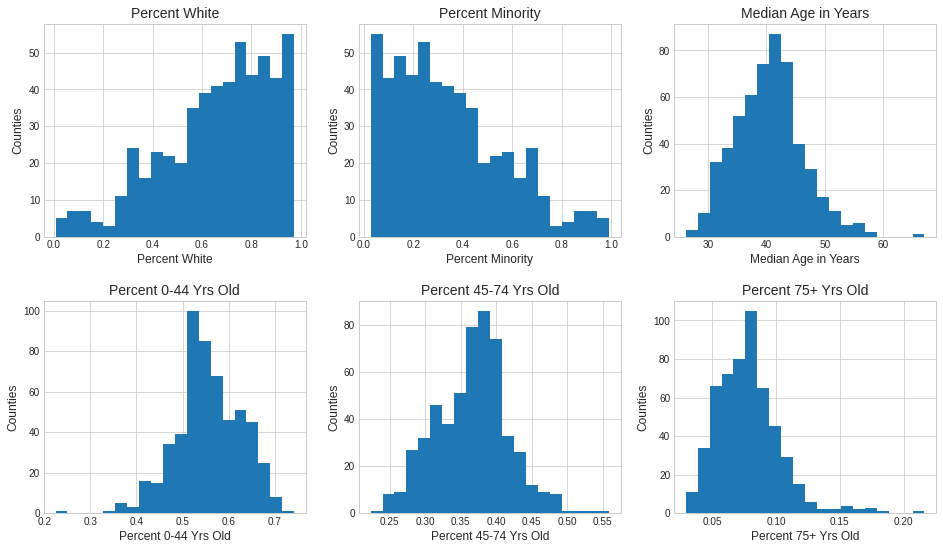

In [30]:
subplot_histograms(
    df,
    ['percent_race_pop_white_alone', 'percent_race_pop_minority', 'sex_age_median_age_in_years', 
     'percent_sex_age_pop_0_to_44', 'percent_sex_age_pop_45_to_74', 'percent_sex_age_pop_75_and_over'],
    ['Percent White', 'Percent Minority', 'Median Age in Years', 'Percent 0-44 Yrs Old', 
     'Percent 45-74 Yrs Old', 'Percent 75+ Yrs Old'],
    ['Percent White', 'Percent Minority', 'Median Age in Years', 'Percent 0-44 Yrs Old',
     'Percent 45-74 Yrs Old', 'Percent 75+ Yrs Old'],
    ['Counties', 'Counties', 'Counties', 'Counties', 'Counties', 'Counties'],
    figsize=(16,9),
    bins=20,
    ncols=3,
    hspace=.3
)

## Plotting variables against 'cases_per_100_people'

In [31]:
# Define a function to help subplot scatterplots.
def subplot_scatter(dataframe, list_of_xcolumns, list_of_ycolumns, list_of_titles, 
                    list_of_xlabels, list_of_ylabels, figsize, s, ncols, hspace):
    plt.style.use('seaborn-whitegrid')
    nrows = int(np.ceil(len(list_of_xcolumns)/ncols)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize) 
    ax = ax.ravel() 
    for i, xcolumn in enumerate(list_of_xcolumns): 
        ax[i].scatter(dataframe[xcolumn], dataframe[list_of_ycolumns[i]], s=s)
        # Set title for each subplot
        ax[i].set_title(list_of_titles[i], fontsize=14)
        # Set xlabel for each subplot
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=12)
        # Set ylabel for each subplot
        ax[i].set_ylabel(list_of_ylabels[i], fontsize=12)
        plt.subplots_adjust(hspace=hspace);

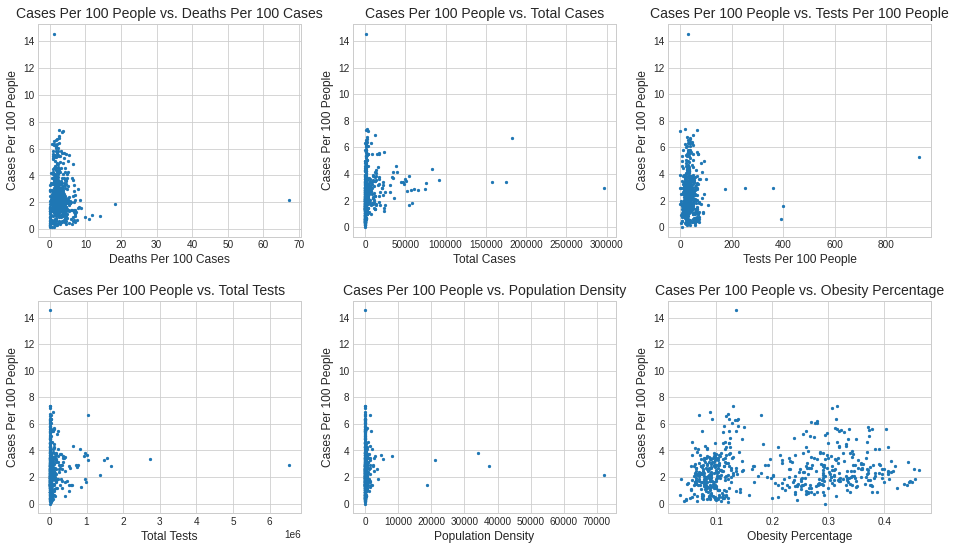

In [32]:
# Plot features of interest against cases_per_100_people.
subplot_scatter(
    df,
    list_of_xcolumns=[
        'deaths_per_100_cases', 'total_cases', 'tests_per_100_people', 
        'total_tests', 'pop_density', 'obes_percent'],
    list_of_ycolumns=[
        'cases_per_100_people', 'cases_per_100_people', 'cases_per_100_people', 
        'cases_per_100_people', 'cases_per_100_people', 'cases_per_100_people'],
    list_of_titles=[
        'Cases Per 100 People vs. Deaths Per 100 Cases',
        'Cases Per 100 People vs. Total Cases',
        'Cases Per 100 People vs. Tests Per 100 People',
        'Cases Per 100 People vs. Total Tests',
        'Cases Per 100 People vs. Population Density',
        'Cases Per 100 People vs. Obesity Percentage'],
    list_of_xlabels=[
        'Deaths Per 100 Cases', 'Total Cases', 'Tests Per 100 People',
        'Total Tests', 'Population Density', 'Obesity Percentage'],
    list_of_ylabels=[
        'Cases Per 100 People', 'Cases Per 100 People', 'Cases Per 100 People',
        'Cases Per 100 People', 'Cases Per 100 People', 'Cases Per 100 People'],
    figsize=(16,9), s=5, ncols=3, hspace=.3)

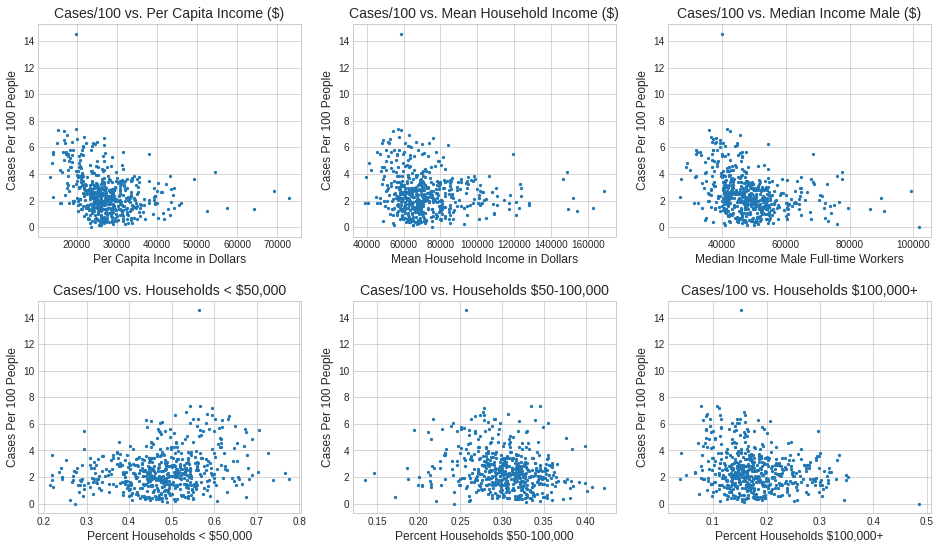

In [33]:
# Plot features of interest against cases_per_100_people.
subplot_scatter(
    df,
    list_of_xcolumns=[
        'inc_per_capita_inc_dol', 'inc_mean_hhld_inc_dol', 'inc_med_earn_male_full_yr_workers_dol', 
        'percent_inc_hhlds_less_than_49_999', 'percent_inc_hhlds_50_000_to_99_999', 'percent_inc_hhlds_100_000_or_more'],
    list_of_ycolumns=[
        'cases_per_100_people', 'cases_per_100_people', 'cases_per_100_people', 
        'cases_per_100_people', 'cases_per_100_people', 'cases_per_100_people'],
    list_of_titles=[
        'Cases/100 vs. Per Capita Income ($)', 'Cases/100 vs. Mean Household Income ($)',
        'Cases/100 vs. Median Income Male ($)', 'Cases/100 vs. Households < $50,000',
        'Cases/100 vs. Households $50-100,000', 'Cases/100 vs. Households $100,000+'],
    list_of_xlabels=[
        'Per Capita Income in Dollars', 'Mean Household Income in Dollars', 'Median Income Male Full-time Workers', 
        'Percent Households < $50,000', 'Percent Households $50-100,000', 'Percent Households $100,000+'],
    list_of_ylabels=[
        'Cases Per 100 People', 'Cases Per 100 People', 'Cases Per 100 People',
        'Cases Per 100 People', 'Cases Per 100 People', 'Cases Per 100 People'],
    figsize=(16,9), s=5, ncols=3, hspace=.3)

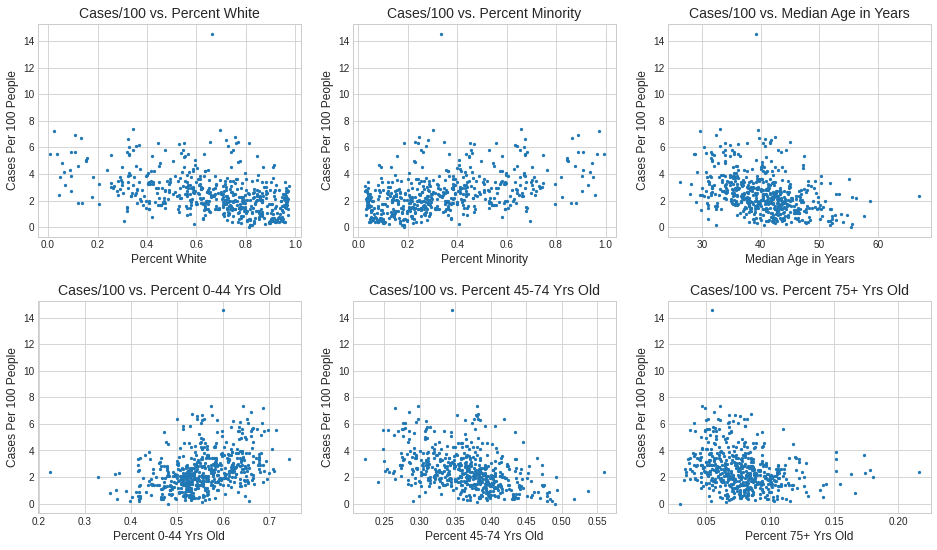

In [34]:
# Plot features of interest against cases_per_100_people.
subplot_scatter(
    df,
    list_of_xcolumns=[
        'percent_race_pop_white_alone', 'percent_race_pop_minority', 'sex_age_median_age_in_years', 
        'percent_sex_age_pop_0_to_44', 'percent_sex_age_pop_45_to_74', 'percent_sex_age_pop_75_and_over'],
    list_of_ycolumns=[
        'cases_per_100_people', 'cases_per_100_people', 'cases_per_100_people', 
        'cases_per_100_people', 'cases_per_100_people', 'cases_per_100_people'],
    list_of_titles=[
        'Cases/100 vs. Percent White', 'Cases/100 vs. Percent Minority',
        'Cases/100 vs. Median Age in Years', 'Cases/100 vs. Percent 0-44 Yrs Old',
        'Cases/100 vs. Percent 45-74 Yrs Old', 'Cases/100 vs. Percent 75+ Yrs Old'],
    list_of_xlabels=[
        'Percent White', 'Percent Minority', 'Median Age in Years', 
        'Percent 0-44 Yrs Old', 'Percent 45-74 Yrs Old', 'Percent 75+ Yrs Old'],
    list_of_ylabels=[
        'Cases Per 100 People', 'Cases Per 100 People', 'Cases Per 100 People',
        'Cases Per 100 People', 'Cases Per 100 People', 'Cases Per 100 People'],
    figsize=(16,9), s=5, ncols=3, hspace=.3)

## Visualizing Cases Per 100 People

### Highest 'cases_per_100_people' Counties

In [35]:
# Extract the 10 counties with the highest cases_per_100_people.
top_10_per = df.sort_values(by='cases_per_100_people', ascending=False)[:10]

In [36]:
colors = {'California':'xkcd:yellowish','Florida':'xkcd:dusty green', 
          'Illinois':'xkcd:melon', 'New York':'xkcd:light grey blue', 'Texas':'xkcd:amber'}

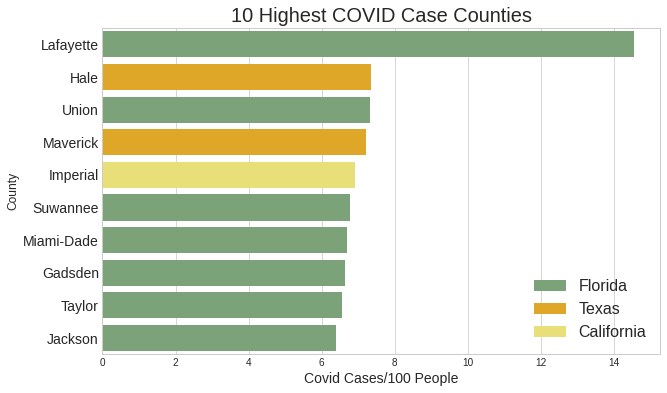

In [37]:
# Plot the 10 counties with the lowest cases_per_100_people by state.
plt.figure(figsize=(10, 6))
g = sns.barplot(x='cases_per_100_people', y='county', hue='state', data=top_10_per, dodge=False, palette=colors)
g.legend(loc='lower right', fontsize=16)
plt.xlabel('Covid Cases/100 People', fontsize=14)
plt.ylabel('County', fontsize=12)
plt.yticks(fontsize=14)
plt.title('10 Highest COVID Case Counties', fontsize=20);

### Lowest 'cases_per_100_people' Counties

In [38]:
# Extract the 10 counties with the lowest cases_per_100_people.
bot_10_per = df.sort_values(by='cases_per_100_people', ascending=True)[1:11]

In [39]:
# Sort the bottom 20 counties in descending order.
bot_10_per = bot_10_per.sort_values(by='cases_per_100_people', ascending=False)

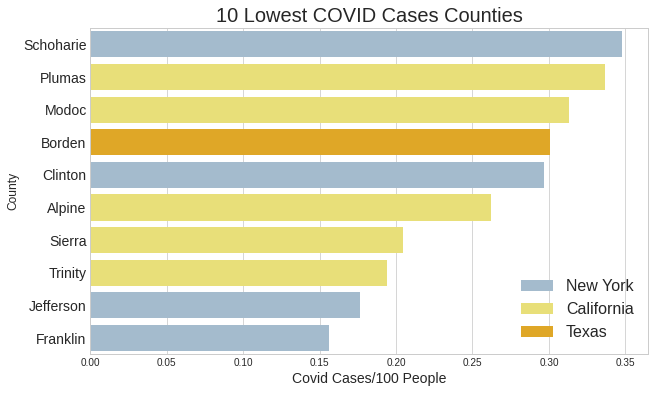

In [40]:
# Plot the 10 counties with the lowest cases_per_100_people by state.
plt.figure(figsize=(10, 6))
g = sns.barplot(x='cases_per_100_people', y='county', hue='state', data=bot_10_per, dodge=False, palette = colors)
g.legend(loc='lower right', fontsize=16)
plt.xlabel('Covid Cases/100 People', fontsize=14)
plt.ylabel('County', fontsize=12)
plt.yticks(fontsize=14)
plt.title('10 Lowest COVID Cases Counties', fontsize=20);

# Trying To Do It Together

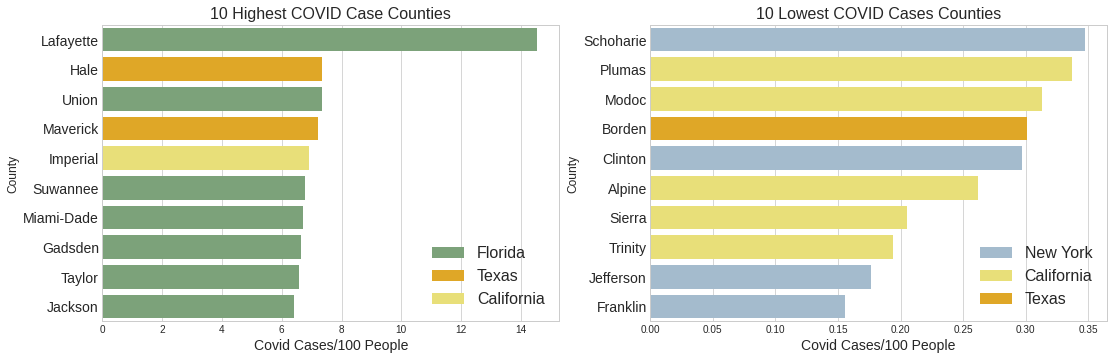

In [41]:
# Plot the 10 counties with the highest cases_per_100_people by state.

# Plot the 
plt.figure(figsize=(18,12))

plt.subplot(2, 2, 1)
g = sns.barplot(x='cases_per_100_people', y='county', hue='state', data=top_10_per, dodge=False, palette=colors)
g.legend(loc='lower right', fontsize=16)
plt.xlabel('Covid Cases/100 People', fontsize=14)
plt.ylabel('County', fontsize=12)
plt.yticks(fontsize=14)
plt.title('10 Highest COVID Case Counties', fontsize=16);

plt.subplot(2, 2, 2)
g = sns.barplot(x='cases_per_100_people', y='county', hue='state', data=bot_10_per, dodge=False, palette = colors)
g.legend(loc='lower right', fontsize=16)
plt.xlabel('Covid Cases/100 People', fontsize=14)
plt.ylabel('County', fontsize=12)
plt.yticks(fontsize=14)
plt.title('10 Lowest COVID Cases Counties', fontsize=16);

## Visualizing Cases

### Highest COVID Case Counties

In [42]:
# Extract the 10 counties with the highest cases.
top_10_cas = df.sort_values(by='total_cases', ascending=False)[:10]

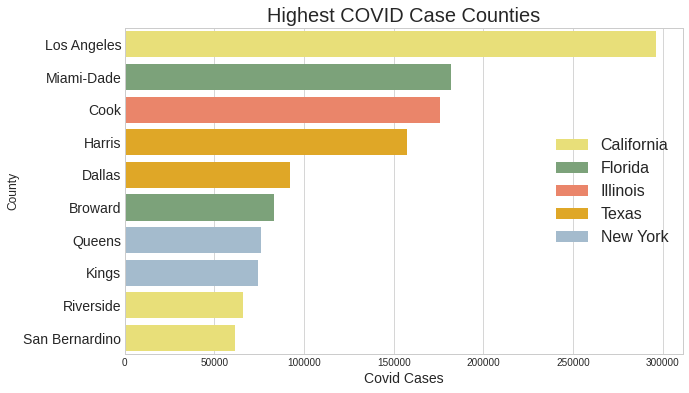

In [43]:
# Plot the 10 counties with the highest cases by state.
plt.figure(figsize=(10, 6))
g = sns.barplot(x='total_cases', y='county', hue='state', data=top_10_cas, dodge=False, palette=colors)
g.legend(loc='center right', fontsize=16)
plt.xlabel('Covid Cases', fontsize=14)
plt.ylabel('County', fontsize=12)
plt.yticks(fontsize=14)
plt.title('Highest COVID Case Counties', fontsize=20);

### Lowest COVID Case Counties

In [44]:
# Extract the 10 counties with the lowest cases.
bot_10_cas = df.sort_values(by='total_cases', ascending=True)[1:11]

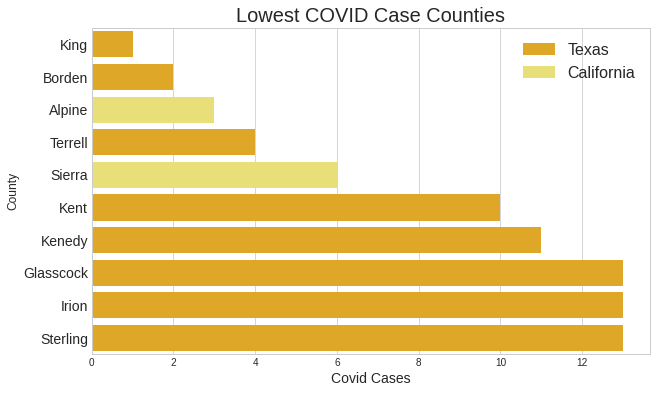

In [45]:
# Plot the 10 counties with the lowest cases by state.
plt.figure(figsize=(10, 6))
g = sns.barplot(x='total_cases', y='county', hue='state', data=bot_10_cas, dodge=False, palette=colors)
g.legend(loc='upper right', fontsize=16)
plt.xlabel('Covid Cases', fontsize=14)
plt.ylabel('County', fontsize=12)
plt.yticks(fontsize=14)
plt.title('Lowest COVID Case Counties', fontsize=20);

## Visualizing Death Rate

### Highest Death Rate Counties

In [46]:
# Extract the 10 counties with the highest death rate.
top_10_dea = df.sort_values(by='death_rate', ascending=False)[:10]

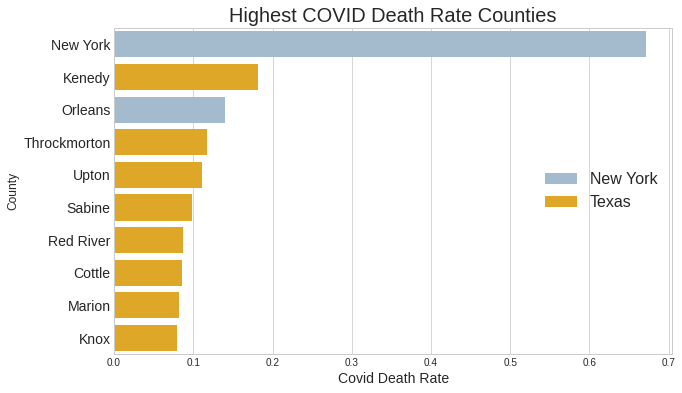

In [47]:
# Plot the 10 counties with the highest death rate by state.
plt.figure(figsize=(10, 6))
g = sns.barplot(x='death_rate', y='county', hue='state', data=top_10_dea, dodge=False, palette=colors)
g.legend(loc='center right', fontsize=16)
plt.xlabel('Covid Death Rate', fontsize=14)
plt.ylabel('County', fontsize=12)
plt.yticks(fontsize=14)
plt.title('Highest COVID Death Rate Counties', fontsize=20);

## Comparing High and Low COVID Counties

In [48]:
# Extract the 20 counties with the highest cases_per_100_people.
top_20_per = df.sort_values(by='cases_per_100_people', ascending=False)[:20]

In [49]:
# Extract the 20 counties with the highest cases_per_100_people.
low_20_per = df.sort_values(by='cases_per_100_people', ascending=True)[:20]

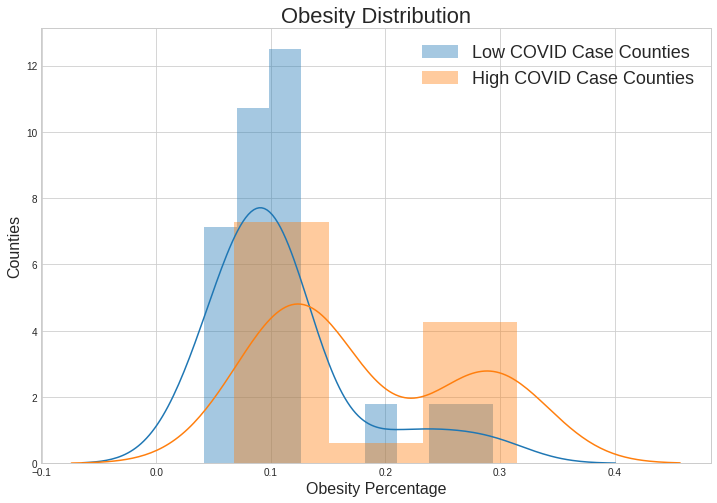

In [55]:
plt.figure(figsize=(12,8))
plt.title('Obesity Distribution', fontsize=22)
sns.distplot(low_20_per['obes_percent'], label='Low COVID Case Counties')
sns.distplot(top_20_per['obes_percent'], label='High COVID Case Counties')
plt.xlabel('Obesity Percentage', fontsize=16)
plt.ylabel('Counties', fontsize=16)
plt.legend(fontsize=18);

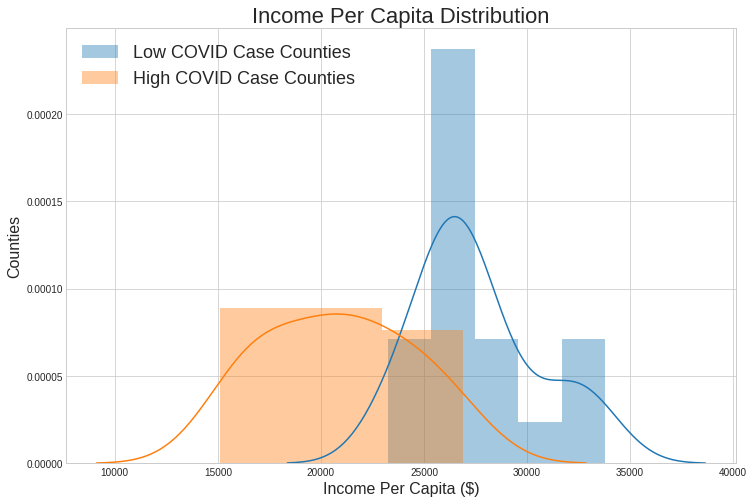

In [54]:
plt.figure(figsize=(12,8))
plt.title('Income Per Capita Distribution', fontsize=22)
sns.distplot(low_20_per['inc_per_capita_inc_dol'], label='Low COVID Case Counties')
sns.distplot(top_20_per['inc_per_capita_inc_dol'], label='High COVID Case Counties')
plt.xlabel('Income Per Capita ($)', fontsize=16)
plt.ylabel('Counties', fontsize=16)
plt.legend(fontsize=18);

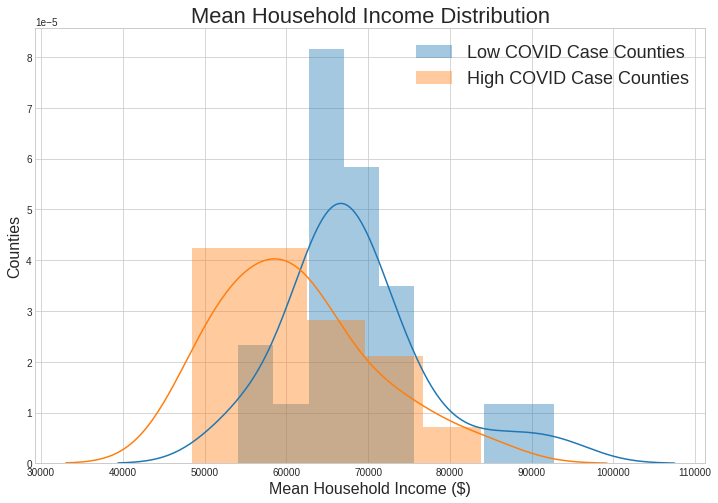

In [57]:
plt.figure(figsize=(12,8))
plt.title('Mean Household Income Distribution', fontsize=22)
sns.distplot(low_20_per['inc_mean_hhld_inc_dol'], label='Low COVID Case Counties')
sns.distplot(top_20_per['inc_mean_hhld_inc_dol'], label='High COVID Case Counties')
plt.xlabel('Mean Household Income ($)', fontsize=16)
plt.ylabel('Counties', fontsize=16)
plt.legend(fontsize=18);

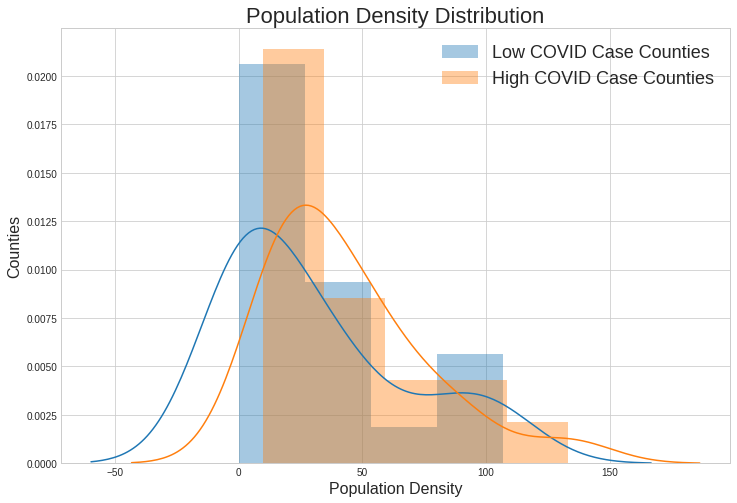

In [58]:
# Drops outlier population density
plt.figure(figsize=(12,8))
plt.title('Population Density Distribution', fontsize=22)
sns.distplot(low_20_per['pop_density'], label='Low COVID Case Counties')
sns.distplot(top_20_per[top_20_per['pop_density'] < 1400]['pop_density'], label='High COVID Case Counties')
plt.xlabel('Population Density', fontsize=16)
plt.ylabel('Counties', fontsize=16)
plt.legend(fontsize=18);

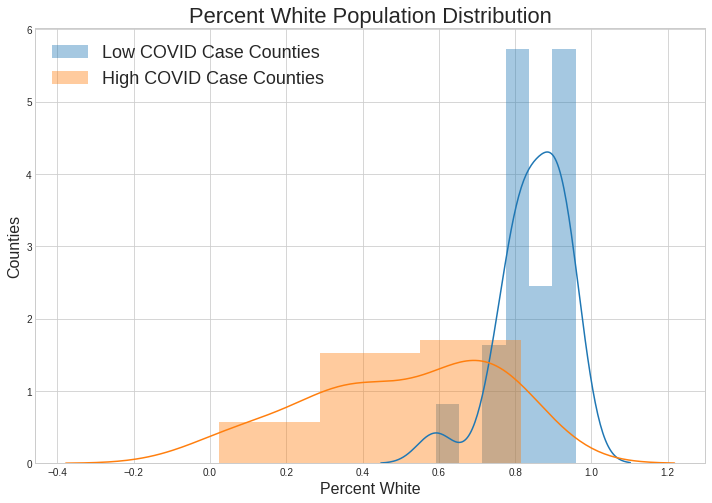

In [59]:
plt.figure(figsize=(12,8))
plt.title('Percent White Population Distribution', fontsize=22)
sns.distplot(low_20_per['percent_race_pop_white_alone'], label='Low COVID Case Counties')
sns.distplot(top_20_per['percent_race_pop_white_alone'], label='High COVID Case Counties')
plt.xlabel('Percent White', fontsize=16)
plt.ylabel('Counties', fontsize=16)
plt.legend(fontsize=18);

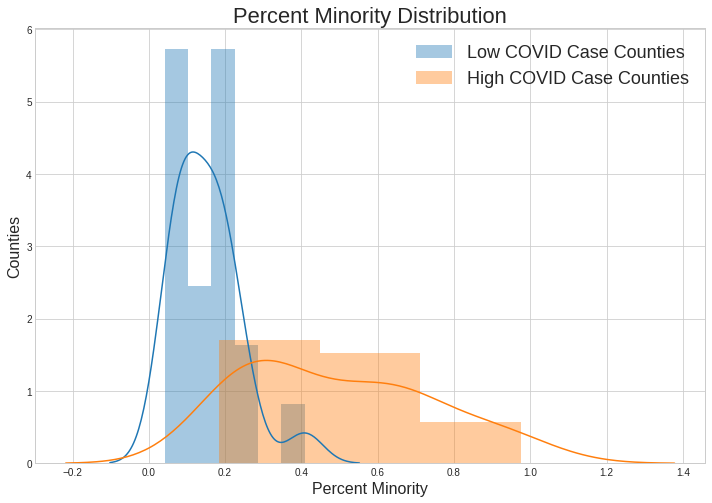

In [60]:
plt.figure(figsize=(12,8))
plt.title('Percent Minority Distribution', fontsize=22)
sns.distplot(low_20_per['percent_race_pop_minority'], label='Low COVID Case Counties')
sns.distplot(top_20_per['percent_race_pop_minority'], label='High COVID Case Counties')
plt.xlabel('Percent Minority', fontsize=16)
plt.ylabel('Counties', fontsize=16)
plt.legend(fontsize=18);

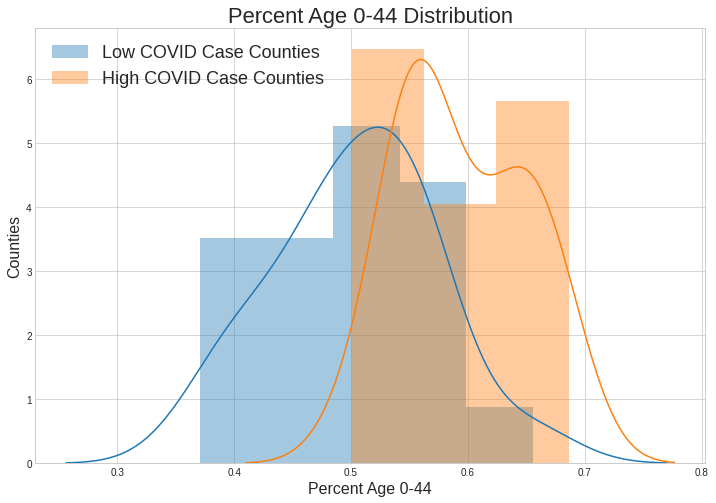

In [61]:
plt.figure(figsize=(12,8))
plt.title('Percent Age 0-44 Distribution', fontsize=22)
sns.distplot(low_20_per['percent_sex_age_pop_0_to_44'], label='Low COVID Case Counties')
sns.distplot(top_20_per['percent_sex_age_pop_0_to_44'], label='High COVID Case Counties')
plt.xlabel('Percent Age 0-44', fontsize=16)
plt.ylabel('Counties', fontsize=16)
plt.legend(fontsize=18);

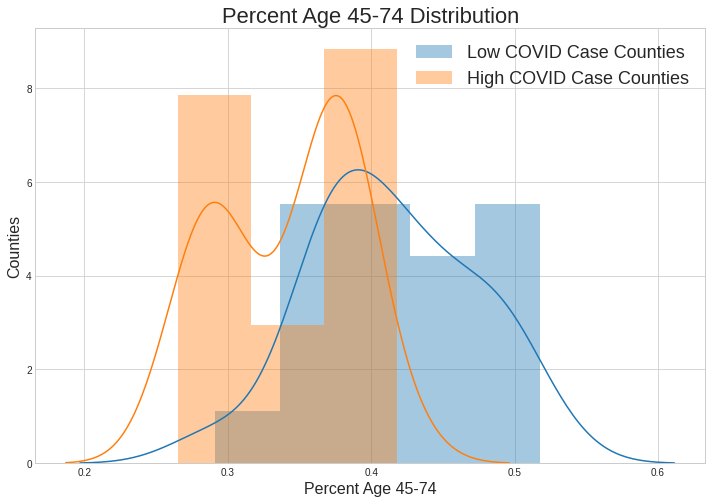

In [62]:
plt.figure(figsize=(12,8))
plt.title('Percent Age 45-74 Distribution', fontsize=22)
sns.distplot(low_20_per['percent_sex_age_pop_45_to_74'], label='Low COVID Case Counties')
sns.distplot(top_20_per['percent_sex_age_pop_45_to_74'], label='High COVID Case Counties')
plt.xlabel('Percent Age 45-74', fontsize=16)
plt.ylabel('Counties', fontsize=16)
plt.legend(fontsize=18);

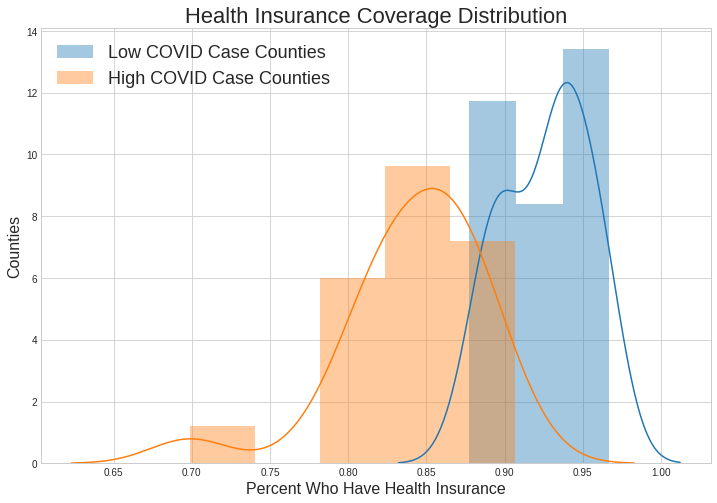

In [63]:
plt.figure(figsize=(12,8))
plt.title('Health Insurance Coverage Distribution', fontsize=22)
sns.distplot(low_20_per['percent_health_ins_noninst_pop_cov_yes'], label='Low COVID Case Counties')
sns.distplot(top_20_per['percent_health_ins_noninst_pop_cov_yes'], label='High COVID Case Counties')
plt.xlabel('Percent Who Have Health Insurance', fontsize=16)
plt.ylabel('Counties', fontsize=16)
plt.legend(fontsize=18);

# Break Out State Data

In [46]:
df_ca = df[df['county_state'].str.contains('California')]

In [47]:
df_fl = df[df['county_state'].str.contains('Florida')]

In [48]:
df_il = df[df['county_state'].str.contains('Illinois')]

In [49]:
df_ny = df[df['county_state'].str.contains('New York')]

In [50]:
df_tx = df[df['county_state'].str.contains('Texas')]

# Export Data for Modeling

In [51]:
df.to_csv('../data/cleaned_engineered_five_states.csv', index=False)

In [52]:
df_ca.to_csv('../data/cleaned_engineered_ca.csv', index=False)

In [53]:
df_fl.to_csv('../data/cleaned_engineered_fl.csv', index=False)

In [54]:
df_il.to_csv('../data/cleaned_engineered_il.csv', index=False)

In [55]:
df_ny.to_csv('../data/cleaned_engineered_ny.csv', index=False)

In [56]:
df_tx.to_csv('../data/cleaned_engineered_tx.csv', index=False)